## Obtain Part of Speech Data

In [1]:
import pandas as pd
from scipy.stats import ttest_ind
from statistics import mean, stdev
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 18})

In [2]:
asdPOS = pd.read_csv("../confidential/ASD_POS_stats.csv")
controlsPOS = pd.read_csv("../confidential/controls_POS_stats.csv")

Eliminate the controls that were not matched with ASD blogs.  We oversampled controls, so now let's trim to just the pairwise matched control blogs.

In [3]:
matched_to_asd = pd.read_csv("../confidential/controls_matching.csv")
matched_to_asd = matched_to_asd.loc[matched_to_asd['matched_with'] >= 0]

In [4]:
controlsPOS = controlsPOS.loc[controlsPOS['blog_name'].isin(matched_to_asd['blog'])]

## Get Word Count

In [5]:
controlsPOS['word_count'].sum()

3941564

In [6]:
asdPOS['word_count'].sum()

3856577

## Calculate Proportions

We'll want to have the sum of all parts of speech to see proportions.

In [7]:
asdPOS['sum']=asdPOS.sum(axis=1)
asdPOS = asdPOS[asdPOS["sum"] != 0]

controlsPOS['sum']=controlsPOS.sum(axis=1)
controlsPOS = controlsPOS[controlsPOS["sum"] != 0]

We're interested particularly in pronouns and possessives: 

* personal pronouns (*he*, *I*) are represented by PRP
* possessive pronouns (*my*, *yours*) by PRP\$
* possessive endings (*Bob's*, *Akil's*, *brother's*) by POS
* wh-type pronouns (*who*, *whom*) by WP
* wh-type posessive pronouns (*whose*) by WP\$

In [8]:
pronouns_possessives = ["POS", "PRP", "PRP$", "WP", "WP$","sum"]

Let's peek at what our POS data frames look like. Because the dollar sign causes problems in rendering Jupyter notebooks in GitHub, we'll replace it before proceeding.

In [9]:
asd_selected_POS=asdPOS[pronouns_possessives]
asd_selected_POS=asd_selected_POS.rename(columns={'POS' : 'possessive-endings','PRP': 'personal', 'PRP$': 'possessive', 'WP': 'wh-non-possessive', 'WP$': 'wh-possessive'})
asd_selected_POS.head()

,possessive-endings,personal,possessive,wh-non-possessive,wh-possessive,sum
0,10.0,17928.0,6795.0,2336.0,36.0,716455.0
1,NaN,768.0,358.0,113.0,1.0,31889.0
2,NaN,969.0,521.0,77.0,NaN,37167.0
3,NaN,4036.0,2355.0,654.0,5.0,207147.0
4,NaN,1245.0,521.0,223.0,8.0,56994.0


In [10]:
controls_selected_POS=controlsPOS[pronouns_possessives]
controls_selected_POS=controls_selected_POS.rename(columns={'POS' : 'possessive-endings', 'PRP': 'personal', 'PRP$': 'possessive', 'WP': 'wh-non-possessive', 'WP$': 'wh-possessive'})
controls_selected_POS.head()

,possessive-endings,personal,possessive,wh-non-possessive,wh-possessive,sum
6,NaN,5087.0,2704.0,555.0,8.0,182989.0
9,19.0,12191.0,5248.0,1346.0,12.0,460105.0
15,NaN,1719.0,622.0,200.0,NaN,54669.0
18,NaN,5465.0,2066.0,729.0,1.0,195812.0
30,3.0,4738.0,2867.0,593.0,4.0,245275.0


Let's create percentage-of-total columns.  Note that where NaN exists, there should be a count of 0, so let's fix that now, as well.

In [11]:
asd_selected_POS = asd_selected_POS.join(asd_selected_POS.div(asd_selected_POS['sum'], axis=0), rsuffix='_pct').fillna(0)
asd_selected_POS.head()

,possessive-endings,personal,possessive,wh-non-possessive,wh-possessive,sum,possessive-endings_pct,personal_pct,possessive_pct,wh-non-possessive_pct,wh-possessive_pct,sum_pct
0,10.0,17928.0,6795.0,2336.0,36.0,716455.0,0.000014,0.025023,0.009484,0.003260,0.000050,1.0
1,0.0,768.0,358.0,113.0,1.0,31889.0,0.000000,0.024084,0.011226,0.003544,0.000031,1.0
2,0.0,969.0,521.0,77.0,0.0,37167.0,0.000000,0.026072,0.014018,0.002072,0.000000,1.0
3,0.0,4036.0,2355.0,654.0,5.0,207147.0,0.000000,0.019484,0.011369,0.003157,0.000024,1.0
4,0.0,1245.0,521.0,223.0,8.0,56994.0,0.000000,0.021844,0.009141,0.003913,0.000140,1.0


In [12]:
controls_selected_POS = controls_selected_POS.join(controls_selected_POS.div(controls_selected_POS['sum'], axis=0), rsuffix='_pct').fillna(0)
controls_selected_POS.head()

,possessive-endings,personal,possessive,wh-non-possessive,wh-possessive,sum,possessive-endings_pct,personal_pct,possessive_pct,wh-non-possessive_pct,wh-possessive_pct,sum_pct
6,0.0,5087.0,2704.0,555.0,8.0,182989.0,0.000000,0.027799,0.014777,0.003033,0.000044,1.0
9,19.0,12191.0,5248.0,1346.0,12.0,460105.0,0.000041,0.026496,0.011406,0.002925,0.000026,1.0
15,0.0,1719.0,622.0,200.0,0.0,54669.0,0.000000,0.031444,0.011378,0.003658,0.000000,1.0
18,0.0,5465.0,2066.0,729.0,1.0,195812.0,0.000000,0.027909,0.010551,0.003723,0.000005,1.0
30,3.0,4738.0,2867.0,593.0,4.0,245275.0,0.000012,0.019317,0.011689,0.002418,0.000016,1.0


## Visualization and Statistical Tests of Differences

Let's set up a function to calculate effect size, using Cohen's d.

In [13]:
def effectSize(c0, c1):
    cohens_d = (mean(c0) - mean(c1)) / (sqrt((stdev(c0) ** 2 + stdev(c1) ** 2) / 2))
    return(cohens_d)

### Personal Pronouns

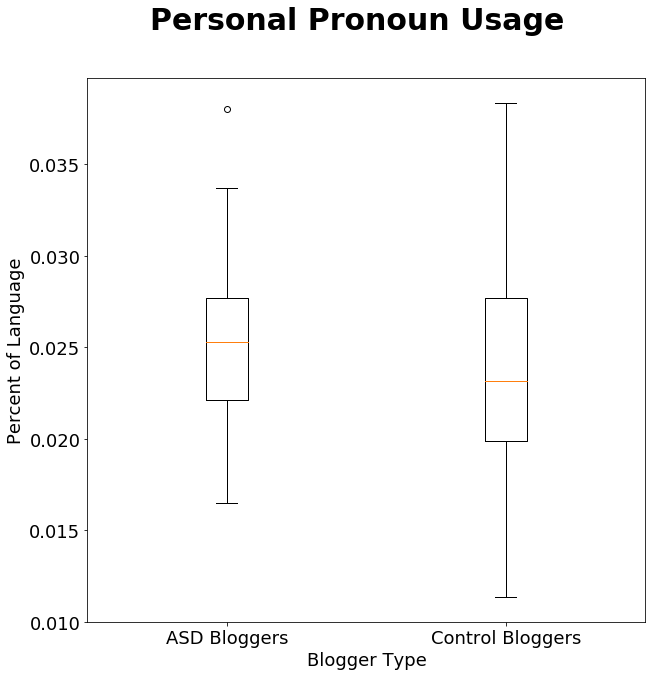

In [14]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Personal Pronoun Usage', fontsize=30, fontweight='bold')

ax = fig.add_subplot(111)
ax.boxplot([asd_selected_POS["personal_pct"],controls_selected_POS["personal_pct"]], labels=["ASD Bloggers", "Control Bloggers"])

ax.set_xlabel('Blogger Type')
ax.set_ylabel('Percent of Language')

plt.show()

It certainly seems as though there is a small difference, with ASD bloggers using more personal pronouns.  Is that the case, and is the difference statistically significant?

In [15]:
pct_diff = (asd_selected_POS["personal_pct"].mean()/controls_selected_POS["personal_pct"].mean())*100-100

print("Mean Personal Pronoun Usage: ASD = " + 
      str(asd_selected_POS["personal_pct"].mean()) +
     "; Controls = " + str(controls_selected_POS["personal_pct"].mean()) +
     "\n\n" +
     "Autistic Bloggers use " + str(round(pct_diff,2)) + "% more personal pronouns.\n\n" +
     "Effect Size: " + str(effectSize(asd_selected_POS["personal_pct"],controls_selected_POS["personal_pct"])))

Mean Personal Pronoun Usage: ASD = 0.025364204124953948; Controls = 0.023842250912828253

Autistic Bloggers use 6.38% more personal pronouns.

Effect Size: 0.30477352078


In [16]:
ttest_ind(asd_selected_POS["personal_pct"],controls_selected_POS["personal_pct"])

Ttest_indResult(statistic=1.6553439278825521, pvalue=0.10055780065042527)

There is a small difference, but it does not rise to the level of significance.

### Possessive Endings

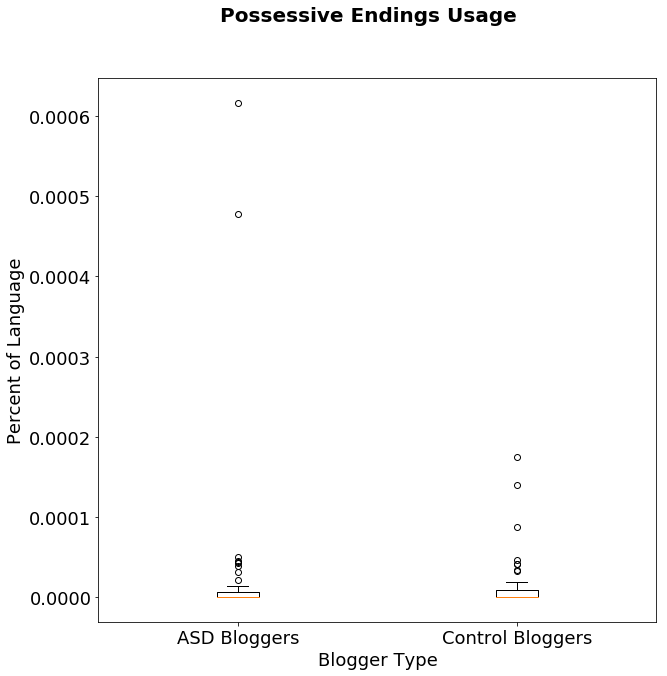

In [17]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Possessive Endings Usage', fontsize=20, fontweight='bold')

ax = fig.add_subplot(111)
ax.boxplot([asd_selected_POS["possessive-endings_pct"],controls_selected_POS["possessive-endings_pct"]], labels=["ASD Bloggers", "Control Bloggers"])

ax.set_xlabel('Blogger Type')
ax.set_ylabel('Percent of Language')

plt.show()

Well, we have some interesting ASD outliers in the possessive endings area.  Still, it seems like possessive endings useage is essentially a tie.  Is that the case?

In [18]:
pct_diff = (asd_selected_POS["possessive-endings_pct"].mean()/controls_selected_POS["possessive-endings_pct"].mean())*100-100

print("Mean Possessive Endings Usage: ASD = " + 
      str(asd_selected_POS["possessive-endings_pct"].mean()) +
     "; Controls = " + str(controls_selected_POS["possessive-endings_pct"].mean()) +
     "\n\n" +
     "Autistic Bloggers use " + str(round(pct_diff,2)) + "% more possessive endings.\n\n" +
     "Effect Size: " + str(effectSize(asd_selected_POS["possessive-endings_pct"],
                                      controls_selected_POS["possessive-endings_pct"])))

Mean Possessive Endings Usage: ASD = 2.4599639234437474e-05; Controls = 1.2074618147830899e-05

Autistic Bloggers use 103.73% more possessive endings.

Effect Size: 0.168259766675


In [19]:
ttest_ind(asd_selected_POS["possessive-endings_pct"],controls_selected_POS["possessive-endings_pct"])

Ttest_indResult(statistic=0.91388445544615471, pvalue=0.3626732026082824)

Yes, the difference is tiny (despite the proportional difference being large) and amounts to, statistically speaking, a tie.

### Possessive Pronouns

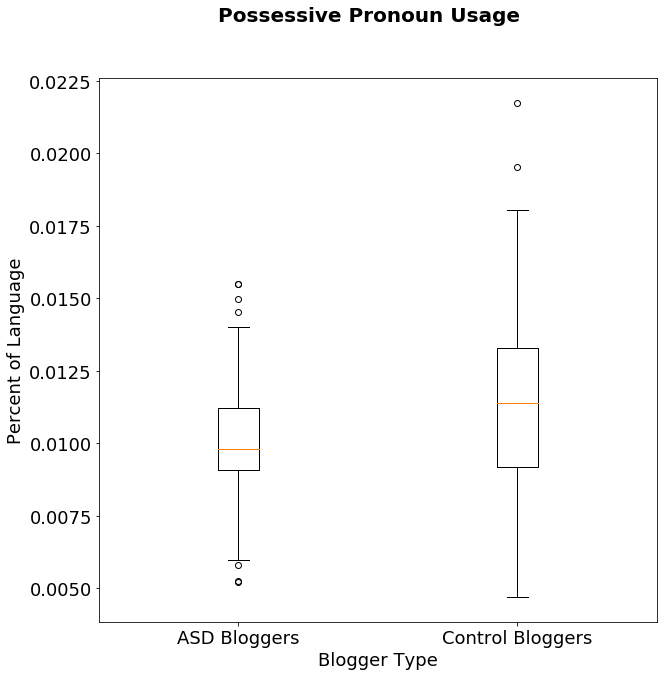

In [20]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Possessive Pronoun Usage', fontsize=20, fontweight='bold')

ax = fig.add_subplot(111)
ax.boxplot([asd_selected_POS["possessive_pct"],controls_selected_POS["possessive_pct"]], labels=["ASD Bloggers", "Control Bloggers"])

ax.set_xlabel('Blogger Type')
ax.set_ylabel('Percent of Language')

plt.show()

Here we see that controls use more possessive pronouns than autistic bloggers.

In [21]:
pct_diff = (asd_selected_POS["possessive_pct"].mean()/controls_selected_POS["possessive_pct"].mean())*100-100

print("Mean Possessive Pronoun Usage: ASD = " + 
      str(asd_selected_POS["possessive_pct"].mean()) +
     "; Controls = " + str(controls_selected_POS["possessive_pct"].mean()) +
     "\n\n" +
     "Autistic Bloggers use " + str(round(pct_diff,2)*-1) + "% fewer possessive endings.\n\n" +
     "Effect Size: " + str(effectSize(asd_selected_POS["possessive_pct"],
                                      controls_selected_POS["possessive_pct"])))

Mean Possessive Pronoun Usage: ASD = 0.010100456085658877; Controls = 0.01156179921121444

Autistic Bloggers use 12.64% fewer possessive endings.

Effect Size: -0.503128822626


In [22]:
ttest_ind(asd_selected_POS["possessive_pct"],controls_selected_POS["possessive_pct"])

Ttest_indResult(statistic=-2.7326889794933762, pvalue=0.0072656175104848274)

Here we have a clear finding: Autistic bloggers use 12.4% fewer possessive pronouns than control bloggers, at a p value of 0.0083. This is a moderate effect size.

### Wh Pronouns (Non-Possessive)

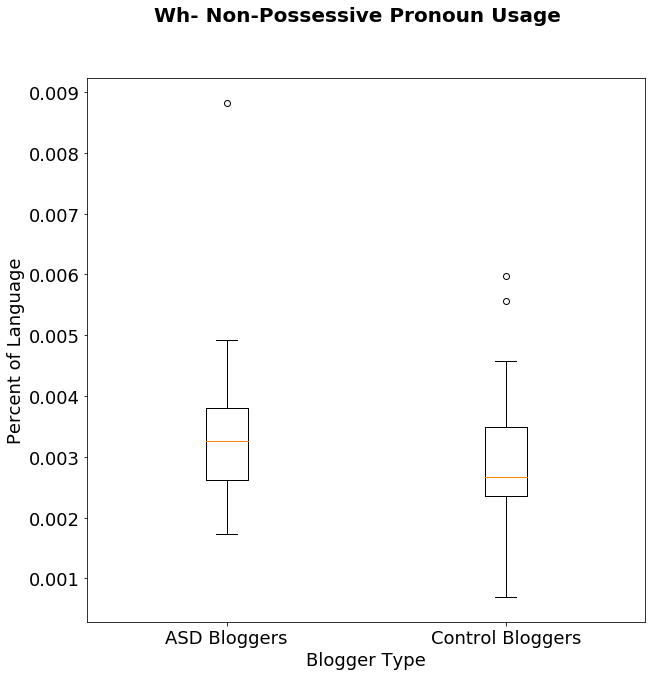

In [23]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Wh- Non-Possessive Pronoun Usage', fontsize=20, fontweight='bold')

ax = fig.add_subplot(111)
ax.boxplot([asd_selected_POS["wh-non-possessive_pct"],controls_selected_POS["wh-non-possessive_pct"]], labels=["ASD Bloggers", "Control Bloggers"])

ax.set_xlabel('Blogger Type')
ax.set_ylabel('Percent of Language')

plt.show()

In [24]:
pct_diff = (asd_selected_POS["wh-non-possessive_pct"].mean()/controls_selected_POS["wh-non-possessive_pct"].mean())*100-100


print("Mean Wh- Non-Possessive Pronoun Usage: ASD = " + 
      str(asd_selected_POS["wh-non-possessive_pct"].mean()) +
     "; Controls = " + str(controls_selected_POS["wh-non-possessive_pct"].mean()) +
     "\n\n" +
     "Autistic Bloggers use " + str(round(pct_diff,2)) + "% more wh- non-possessive pronouns.\n\n" +
     "Effect Size: " + str(effectSize(asd_selected_POS["wh-non-possessive_pct"],
                                      controls_selected_POS["wh-non-possessive_pct"])))

Mean Wh- Non-Possessive Pronoun Usage: ASD = 0.00334118785970426; Controls = 0.0028718110321371247

Autistic Bloggers use 16.34% more wh- non-possessive pronouns.

Effect Size: 0.455227825799


In [25]:
ttest_ind(asd_selected_POS["wh-non-possessive_pct"],controls_selected_POS["wh-non-possessive_pct"])

Ttest_indResult(statistic=2.4725199725678082, pvalue=0.014866713874248587)

Here we find that autistic bloggers use 16.63% more wh- non-possessive pronouns than control bloggers, at a p value of 0.0134.  This is a small to moderate effect size.

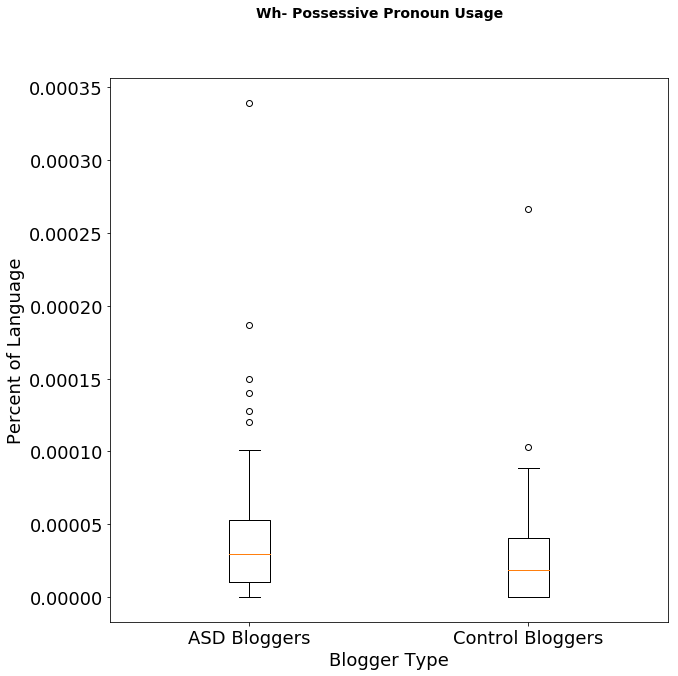

In [26]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Wh- Possessive Pronoun Usage', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
ax.boxplot([asd_selected_POS["wh-possessive_pct"],controls_selected_POS["wh-possessive_pct"]], labels=["ASD Bloggers", "Control Bloggers"])

ax.set_xlabel('Blogger Type')
ax.set_ylabel('Percent of Language')

plt.show()

In [27]:
pct_diff = (asd_selected_POS["wh-possessive_pct"].mean()/controls_selected_POS["wh-possessive_pct"].mean())*100-100


print("Mean Wh- Possessive Pronoun Usage: ASD = " + 
      str(asd_selected_POS["wh-possessive_pct"].mean()) +
     "; Controls = " + str(controls_selected_POS["wh-possessive_pct"].mean()) +
     "\n\n" +
     "Autistic Bloggers use " + str(round(pct_diff,2)) + "% more Wh- possessive pronouns.\n\n" +
     "Effect Size: " + str(effectSize(asd_selected_POS["wh-possessive_pct"],controls_selected_POS["wh-possessive_pct"])))

Mean Wh- Possessive Pronoun Usage: ASD = 4.489469914100682e-05; Controls = 2.7304788434854945e-05

Autistic Bloggers use 64.42% more Wh- possessive pronouns.

Effect Size: 0.355609707407


In [28]:
ttest_ind(asd_selected_POS["wh-possessive_pct"],controls_selected_POS["wh-possessive_pct"])

Ttest_indResult(statistic=1.9314550960513768, pvalue=0.055866337731304776)

While suggestive (p = 0.055), this does not rise to the level of statistical significance.

## Look for Serendipitous Findings

Serendipity, or the unplanned finding of interesting signal, is never unwelcome, but it should be stated as such in any findings, to prevent "HARKing".

In [29]:
asdPOS = asdPOS.drop('blog_name', axis=1)
controlsPOS = controlsPOS.drop('blog_name', axis=1)

In [30]:
asdPOS = asdPOS.drop('word_count', axis=1)
controlsPOS = controlsPOS.drop('word_count', axis=1)

In [31]:
asd_all_POS = asdPOS.join(asdPOS.div(asdPOS['sum'], axis=0), rsuffix='_pct').fillna(0)
controls_all_POS = controlsPOS.join(controlsPOS.div(controlsPOS['sum'], axis=0), rsuffix='_pct').fillna(0)

In [32]:
for col in list(asd_all_POS):
    significant = ""
    if col.find("_pct") >= 1:
        ttest = ttest_ind(asd_all_POS[col],controls_all_POS[col])
        es = effectSize(asd_all_POS[col],controls_all_POS[col])
        if ttest.pvalue < 0.05:
            significant = " SIGNIFICANT.  Effect Size: " + str(es)
        if ttest.pvalue < 0.01:
            significant = " HIGHLY SIGNIFICANT.  Effect Size: " + str(es)
        print(col + " p-value: " + str(ttest.pvalue) + significant)
        
        

#_pct p-value: 0.192865790019
$_pct p-value: 0.0165840218545 SIGNIFICANT.  Effect Size: -0.447599859582
''_pct p-value: 0.564246974723
(_pct p-value: 0.86685644126
)_pct p-value: 0.913364213795
,_pct p-value: 0.240956095002
._pct p-value: 0.544821008904
:_pct p-value: 0.128433550854
CC_pct p-value: 0.384562295239
CD_pct p-value: 3.3686154346e-05 HIGHLY SIGNIFICANT.  Effect Size: -0.794534985017
DT_pct p-value: 0.0173190676399 SIGNIFICANT.  Effect Size: -0.444548162173
EX_pct p-value: 0.00150531697468 HIGHLY SIGNIFICANT.  Effect Size: 0.598569454461
FW_pct p-value: 0.713807745503
IN_pct p-value: 0.466883517237
JJ_pct p-value: 0.00184889471085 HIGHLY SIGNIFICANT.  Effect Size: 0.586734409553
JJR_pct p-value: 0.277537297385
JJS_pct p-value: 0.237940142452
LS_pct p-value: 0.565689836219
MD_pct p-value: 0.127424499242
NN_pct p-value: 0.00196994488132 HIGHLY SIGNIFICANT.  Effect Size: -0.583049697198
NNP_pct p-value: 0.00122506099381 HIGHLY SIGNIFICANT.  Effect Size: 0.610267064932
NNPS_pct 

/Users/paytonk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


We have a number of serendipitous findings.  In addition to the parts of speech that were our focus, we also note that there are significant differences in other parts of speech:

* $: Literal dollar sign
* CD: Cardinal number
* DT: Determiner
* EX: Existential "there"
* JJ: Adjectives
* NN: Noun, singular or mass
* NNP: Proper noun, singular
* NNPS: Proper noun, plural
* RB: Adverb
* RBR: Adverb, comparative
* UH: Interjection
* VBP: Verb, non-3rd person singular present
* WRB: Wh-adverb

Recalling that a p value of 0.05 means that in a random process, one out of twenty cases will meet significance, we can't be sure that we have true signal on all of these, but some of them are highly significant with large effect sizes.  While numbers, dollar signs, and interjections are highly specific and could be easily skewed by a few bloggers with special interests or communication styles, there are other parts of speech that merit further study.  Adverbs in particular have a large effect size at high levels of significance.